## Read and Clean data

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
sales = pd.read_csv("data.csv", usecols=[
    "Product ID",
    "Product Name",
    "Cathegorie",
    "Product Type",
    "Regions",
    "Where",
    "Additional service ",
    "Unit price ",
    "Sales",
    "Quantity",
    "Sales Last Year",
    "Views",
    "Views Last Year",
    "Quantity Last Year",
    "duration"
])

def sanitize_numbers(df):
    return pd.to_numeric(df.str.replace('Rs.||\s|€|-','', regex=True).str.replace(',', '.')).replace(np.nan, 0)

sales = sales.rename(columns={
    "Unit price ": "Price",
    "Product Name": "Name",
    "Product ID": "Id",
    "Regions": "Region",
    "Cathegorie": "Category",
    "Product Type": "Type",
    "Where": "Location",
    "duration": "Duration",
    "Additional service ": "Additional Service"
})

sales["Price"] = sanitize_numbers(sales["Price"])
sales["Sales"] = sanitize_numbers(sales["Sales"])
sales["Sales Last Year"] = sanitize_numbers(sales["Sales Last Year"])
sales["Views"] = sanitize_numbers(sales["Views"])
sales["Views Last Year"] = sanitize_numbers(sales["Views Last Year"])
sales["Views Last Year"] = sales["Views Last Year"]
sales["Quantity"] = sanitize_numbers(sales["Quantity"])
sales["Quantity Last Year"] = sanitize_numbers(sales["Quantity Last Year"])
sales["Name"] = sales["Name"].astype("string")
sales["Category"] = sales["Category"].astype("category")
sales["Type"] = sales["Type"].astype("string")
sales["Region"] = sales["Region"].astype("string")
sales["Location"] = sales["Location"].astype("string")
sales["Additional Service"] = sales["Additional Service"].astype("string")


## Basic description

In [92]:
sales.describe(exclude=["int64", "string", "category"])

,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
count,289.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,39.010381,371.962630,3417.973486,631.177453,17.139875,1733.129958,606.592902,9.200418
std,21.668667,633.333879,17987.235829,3104.479209,87.996216,9544.780526,3427.975840,52.401467
min,10.000000,29.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,154.450000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,215.900000,221.550000,82.000000,1.000000,0.000000,42.000000,0.000000
75%,60.000000,359.400000,1098.940000,296.500000,6.000000,457.665000,295.500000,2.000000
max,150.000000,7531.900000,227698.100000,56225.000000,1519.000000,130537.920000,61171.000000,871.000000


# Analysis: Aggregates (Categories, Regions, Duration) vs Indicators (Sales, Quantities, Conversion Rate, Product Types)

## --- Categories ---

### Categories Weight in last year's Sales


total Sales last year: 830169.25 euros



,Sales Last Year (in euros),Weight (in %)
Category,,
Astronaute,0.00,0.00
montgolfière / ballon,0.00,0.00
simulateur de chute libre,0.00,0.00
Simulateur de vol,1914.75,0.23
avion de chasse,9082.83,1.09
ULM,60566.50,7.30
Avion,83980.33,10.12
Hélicoptère,171365.51,20.64
montgolfière,503259.33,60.62


Text(0.5, 1.0, 'Category repartition in Last Year Sales')

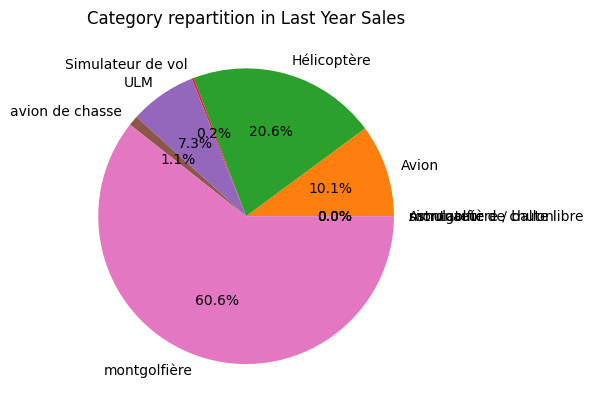

In [93]:
sales_by_category = sales.groupby("Category")["Sales"].sum()
sales_by_category_last_year = sales.groupby("Category")["Sales Last Year"].sum()
categories = sales_by_category.keys()

print(sales_by_category_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_category_last_year, labels=sales_by_category_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Sales")


### Categories Weight in this year's Sales



total Sales this year: 1637209.3 euros



,Sales (in euros),Weight (in %)
Category,,
Astronaute,0.00,0.00
montgolfière / ballon,0.00,0.00
simulateur de chute libre,0.00,0.00
Simulateur de vol,3379.95,0.21
avion de chasse,8937.02,0.55
Avion,73772.90,4.51
ULM,91299.87,5.58
Hélicoptère,230993.12,14.11
montgolfière,1228826.44,75.06


Text(0.5, 1.0, 'Category repartition in This Year Sales')

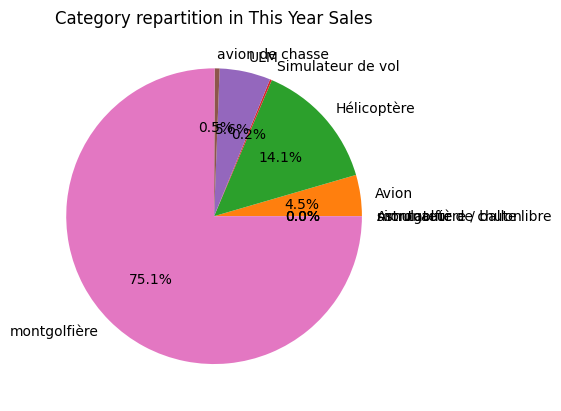

In [94]:
print(sales_by_category.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Sales")

### Sales evolution by Category

,Sales Last Year (in euros),Sales (in euros),Evolution (in %)
Category,,,
Avion,83980.33,73772.90,-12.15
avion de chasse,9082.83,8937.02,-1.61
Hélicoptère,171365.51,230993.12,34.80
ULM,60566.50,91299.87,50.74
Simulateur de vol,1914.75,3379.95,76.52
montgolfière,503259.33,1228826.44,144.17
Astronaute,0.00,0.00,NaN
montgolfière / ballon,0.00,0.00,NaN
simulateur de chute libre,0.00,0.00,NaN


Text(0.5, 1.0, 'Sales (in euros) by Category by Year')

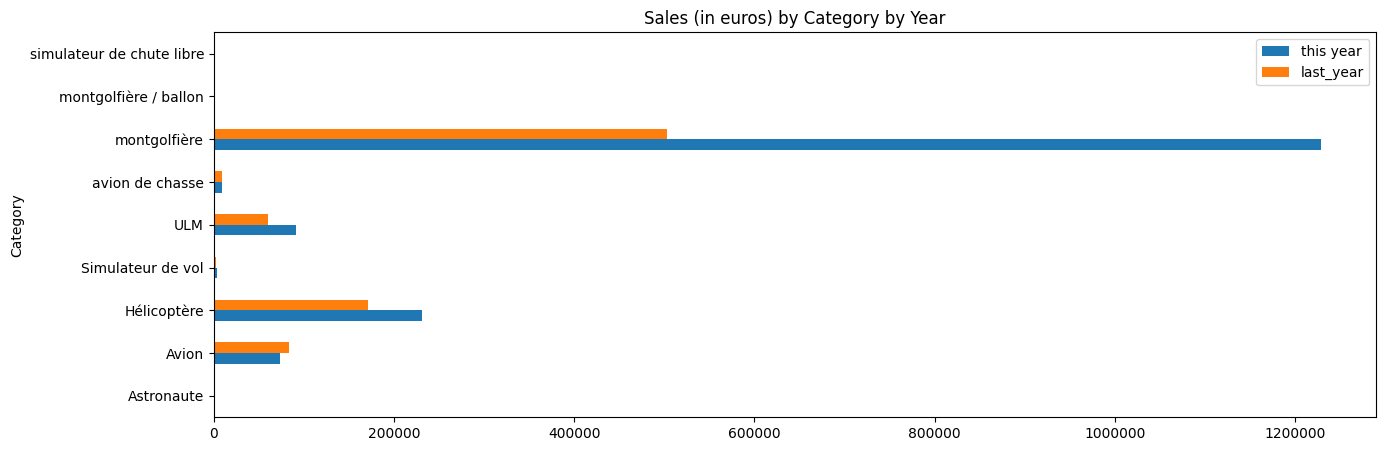

In [95]:
from matplotlib.ticker import FormatStrFormatter

sales_evo_by_category = pd.concat([sales_by_category_last_year, sales_by_category], axis=1)
percentage = (sales_evo_by_category[['Sales Last Year', 'Sales']].pct_change(axis=1)['Sales'] * 100).round(2)
print(percentage.sort_values().map(str) + '%')

df = pd.DataFrame({"this year": sales_by_category, "last_year":sales_by_category_last_year}, index=categories)
ax = df.plot.barh(figsize=(15, 5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%1d'))
ax.set_title("Sales (in euros) by Category by Year")

### Categories Weight in last year's Quantities

total Quantity last year: 4407.0 units



,Sales Last Year (in quantity),Weight (in %)
Category,,
Astronaute,0.0,0.00
montgolfière / ballon,0.0,0.00
simulateur de chute libre,0.0,0.00
avion de chasse,4.0,0.09
Simulateur de vol,19.0,0.43
Avion,578.0,13.12
Hélicoptère,791.0,17.95
ULM,814.0,18.47
montgolfière,2201.0,49.94


Text(0.5, 1.0, 'Category repartition in Last Year Quantity')

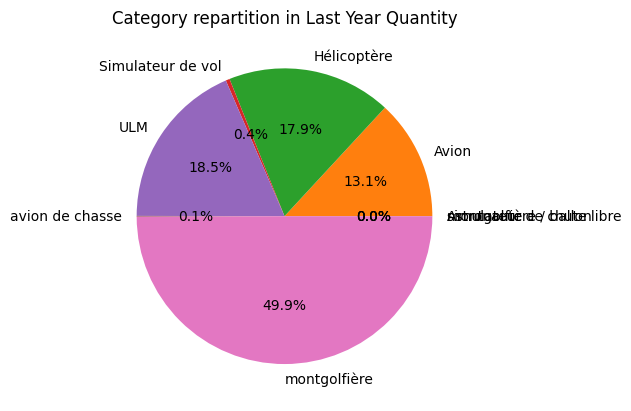

In [96]:
quantity_by_category = sales.groupby("Category")["Quantity"].sum()
quantity_by_category_last_year = sales.groupby("Category")["Quantity Last Year"].sum()
categories = quantity_by_category.keys()

print(quantity_by_category_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_category_last_year, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Quantities")

### Categories Weight in this year's Quantities

total Quantity: 8210.0 units



,Sales (in quantity),Weight (in %)
Category,,
Astronaute,0.0,0.00
montgolfière / ballon,0.0,0.00
simulateur de chute libre,0.0,0.00
avion de chasse,3.0,0.04
Simulateur de vol,34.0,0.41
Avion,582.0,7.09
ULM,1034.0,12.59
Hélicoptère,1188.0,14.47
montgolfière,5369.0,65.40


Text(0.5, 1.0, 'Category repartition in This Year Quantities')

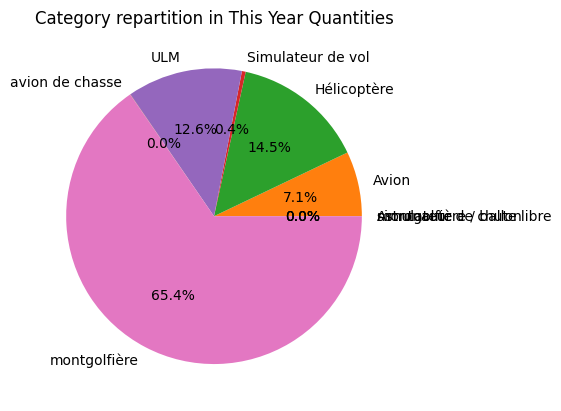

In [97]:
print(quantity_by_category.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Quantities")

### Quantities evolution by Category

,Sales Last Year (in quantity),Sales (in quantity),Evolution (in %)
Category,,,
avion de chasse,4.0,3.0,-25.00
Avion,578.0,582.0,0.69
ULM,814.0,1034.0,27.03
Hélicoptère,791.0,1188.0,50.19
Simulateur de vol,19.0,34.0,78.95
montgolfière,2201.0,5369.0,143.93
Astronaute,0.0,0.0,NaN
montgolfière / ballon,0.0,0.0,NaN
simulateur de chute libre,0.0,0.0,NaN


Text(0.5, 1.0, 'Sales (in quantity) by Category by Year')

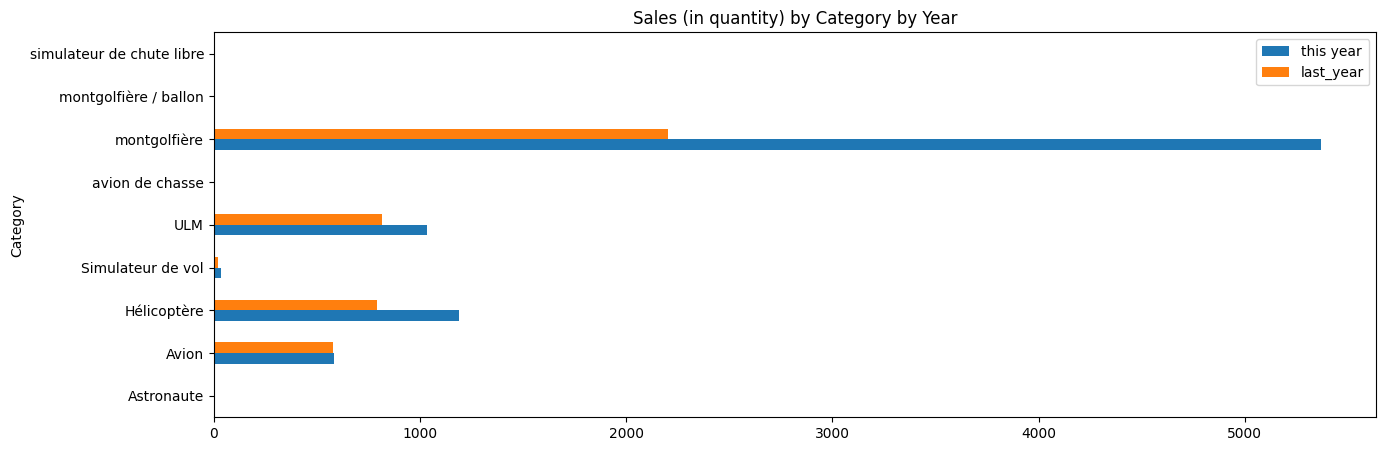

In [98]:
quantities_evo_by_category = pd.concat([quantity_by_category_last_year, quantity_by_category], axis=1)
percentage = (quantities_evo_by_category[['Quantity Last Year', 'Quantity']].pct_change(axis=1)['Quantity'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": quantity_by_category, "last_year":quantity_by_category_last_year}, index=categories)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales (in quantity) by Category by Year")

### Conversion Rate Evolution By Category

,Views Last Year,Sales Last Year (in quantity),Conversion Rate (in %)
Category,,,
Astronaute,335.0,0.0,0.00
simulateur de chute libre,15.0,0.0,0.00
avion de chasse,5440.0,4.0,0.07
montgolfière,169042.0,2201.0,1.30
Hélicoptère,51810.0,791.0,1.53
Avion,29706.0,578.0,1.95
Simulateur de vol,919.0,19.0,2.07
ULM,33291.0,814.0,2.45
montgolfière / ballon,0.0,0.0,NaN


,Views,Sales (in quantity),Conversion Rate (in %)
Category,,,
Astronaute,1128.0,0.0,0.00
montgolfière / ballon,12.0,0.0,0.00
avion de chasse,8172.0,3.0,0.04
Hélicoptère,60097.0,1188.0,1.98
montgolfière,189592.0,5369.0,2.83
Simulateur de vol,1132.0,34.0,3.00
Avion,17065.0,582.0,3.41
ULM,25136.0,1034.0,4.11
simulateur de chute libre,0.0,0.0,NaN


Text(0.5, 1.0, 'Conversion Rate Evolution By Category')

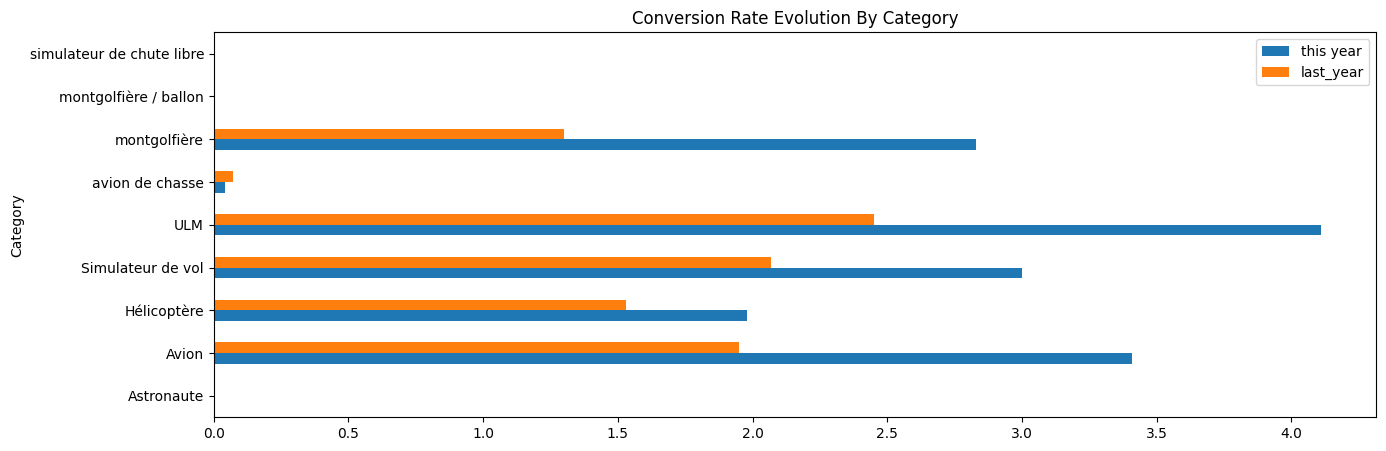

In [124]:
sales["Conversion Rate"] =  sales["Quantity"] * 100 / sales["Views"]
sales["Conversion Rate Last Year"] =  sales["Quantity Last Year"] * 100 / sales["Views Last Year"]

views_by_category = sales.groupby("Category")["Views"].sum()
views_by_category_last_year = sales.groupby("Category")["Views Last Year"].sum()

conversion_rate_by_category = pd.Series((quantity_by_category * 100 / views_by_category).round(2), name="Conversion Rate")
conversion_rate_by_category_last_year = pd.Series((quantity_by_category_last_year * 100 / views_by_category_last_year).round(2), name="Conversion Rate")


print(pd.concat([views_by_category_last_year, quantity_by_category_last_year, conversion_rate_by_category_last_year.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

print("\n")
print(pd.concat([views_by_category, quantity_by_category, conversion_rate_by_category.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

df = pd.DataFrame({"this year": conversion_rate_by_category, "last_year":conversion_rate_by_category_last_year}, index=categories)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Conversion Rate Evolution By Category")

## --- Regions ---


### Regions Weight in last year's Sales

total Sales last year: 830169.25 euros



,Sales Last Year (in euros),Weight (in %)
Region,,
Bretagne,0.00,0.00
Franche-Comté,0.00,0.00
Grand Est,0.00,0.00
Pays de la Loire,782.92,0.09
Bourgogne-Franche-Comté,1494.83,0.18
hors france,4790.83,0.58
Hauts-de-France,7935.17,0.96
Occitanie,10929.57,1.32
PACA & Corse,12512.50,1.51


Text(0.5, 1.0, 'Region repartition in Last Year Sales')

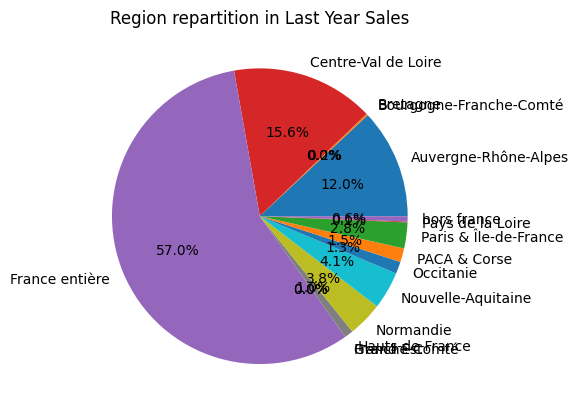

In [134]:
sales_by_region = sales.groupby("Region")["Sales"].sum()
sales_by_region_last_year = sales.groupby("Region")["Sales Last Year"].sum()
regions = sales_by_region.keys()

print(sales_by_region_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_region_last_year, labels=sales_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in last year's Sales")

### Regions weight in this year's Sales

total Sales this year: 1637209.3 euros



,Sales (in euros),Weight (in %)
Region,,
hors france,4047.99,0.04
Franche-Comté,998.20,0.05
Bretagne,5007.68,0.38
Pays de la Loire,4695.01,0.38
Grand Est,18537.76,0.79
PACA & Corse,12673.17,0.84
Occitanie,27124.78,1.28
Bourgogne-Franche-Comté,39540.09,2.34
Nouvelle-Aquitaine,48995.70,3.54


Text(0.5, 1.0, 'Region repartition in this Year Sales')

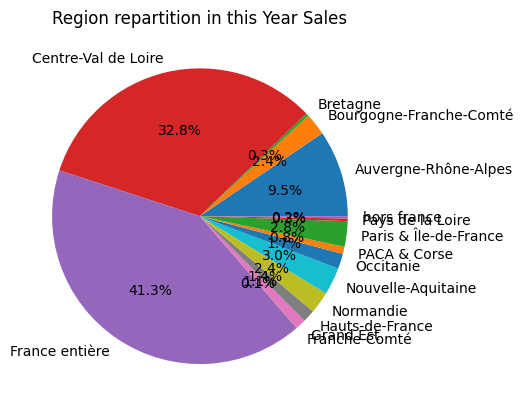

In [135]:
print(sales_by_region.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_region, labels=sales_by_region.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in this year's Sales")

### Sales evolution by Region

,Sales Last Year (in euros),Sales (in euros),Evolution (in %)
Region,,,
hors france,4790.83,4047.99,-15.51
PACA & Corse,12512.50,12673.17,1.28
Normandie,31604.17,39126.36,23.80
France entière,473295.17,676695.48,42.98
Nouvelle-Aquitaine,34097.49,48995.70,43.69
Auvergne-Rhône-Alpes,99454.25,155318.22,56.17
Paris & Île-de-France,23511.01,45698.93,94.37
Occitanie,10929.57,27124.78,148.18
Hauts-de-France,7935.17,22175.77,179.46


Text(0.5, 1.0, 'Sales (in euros) by region by Year')

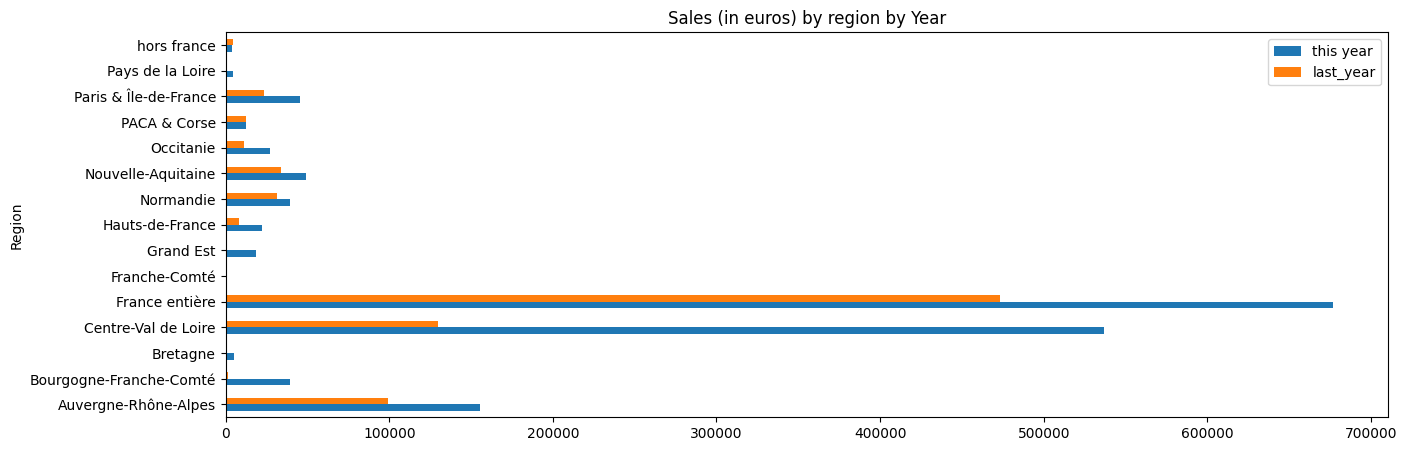

In [117]:
sales_evo_by_region = pd.concat([sales_by_region_last_year, sales_by_region], axis=1)
percentage = (sales_evo_by_region[['Sales Last Year', 'Sales']].pct_change(axis=1)['Sales'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": sales_by_region, "last_year":sales_by_region_last_year}, index=regions)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales (in euros) by Region by Year")

### Regions Weight in last year's Quantities

total quantity last year: 4407.0 units



,Sales Last Year (in quantities),Weight (in %)
Region,,
Bretagne,0.0,0.00
Franche-Comté,0.0,0.00
Grand Est,0.0,0.00
hors france,2.0,0.05
Pays de la Loire,5.0,0.11
Bourgogne-Franche-Comté,11.0,0.25
Occitanie,61.0,1.38
PACA & Corse,66.0,1.50
Hauts-de-France,112.0,2.54


Text(0.5, 1.0, 'Region repartition in Last Year quantity')

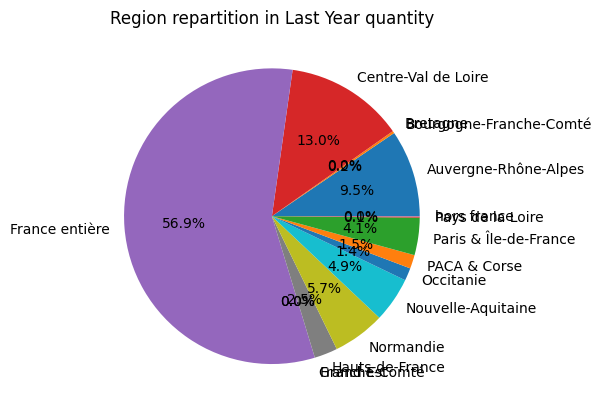

In [120]:
quantity_by_region = sales.groupby("Region")["Quantity"].sum()
quantity_by_region_last_year = sales.groupby("Region")["Quantity Last Year"].sum()
regions = quantity_by_region.keys()

print(quantity_by_region_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_region_last_year, labels=quantity_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in last year's Quantities")

### Regions Weight in this year's Quantities


total quantity this year: 8210.0 units



,Sales (in quantities),Weight (in %)
Region,,
hors france,3.0,0.04
Franche-Comté,4.0,0.05
Bretagne,31.0,0.38
Pays de la Loire,31.0,0.38
Grand Est,65.0,0.79
PACA & Corse,69.0,0.84
Occitanie,105.0,1.28
Bourgogne-Franche-Comté,192.0,2.34
Nouvelle-Aquitaine,291.0,3.54


Text(0.5, 1.0, 'Region repartition in this Year quantity')

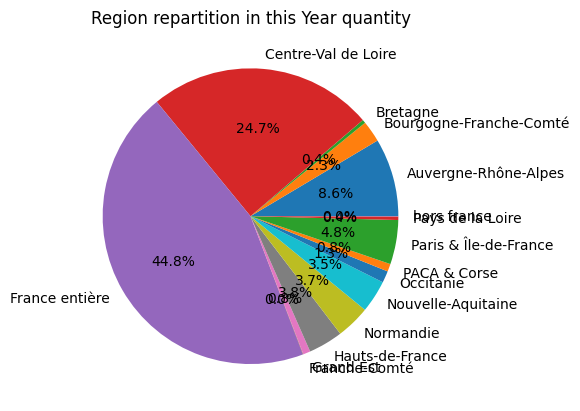

In [136]:
print(quantity_by_region.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_region, labels=quantity_by_region.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in this year's Quantities")

### Quantities evolution by Region

,Sales Last Year (in quantities),Sales (in quantities),Evolution (in %)
Region,,,
PACA & Corse,66.0,69.0,4.55
Normandie,252.0,304.0,20.63
Nouvelle-Aquitaine,217.0,291.0,34.10
France entière,2509.0,3681.0,46.71
hors france,2.0,3.0,50.00
Auvergne-Rhône-Alpes,419.0,702.0,67.54
Occitanie,61.0,105.0,72.13
Paris & Île-de-France,180.0,397.0,120.56
Hauts-de-France,112.0,310.0,176.79


Text(0.5, 1.0, 'Sales (in quantities) by region by Year')

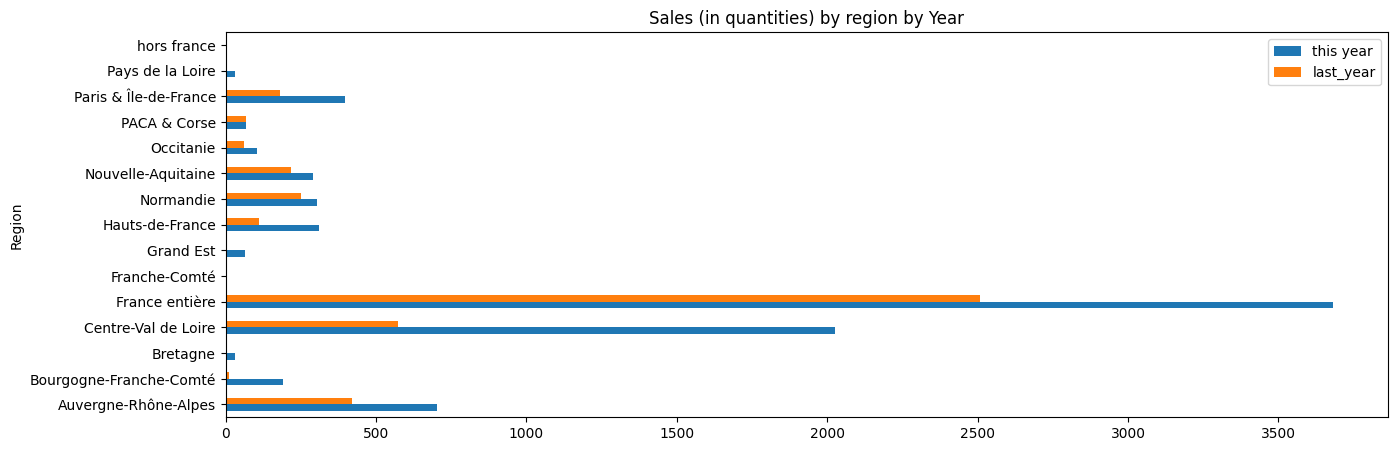

In [137]:
quantity_by_region_evo = pd.concat([quantity_by_region_last_year, quantity_by_region], axis=1)
percentage = (quantity_by_region_evo[['Quantity Last Year', 'Quantity']].pct_change(axis=1)['Quantity'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": quantity_by_region, "last_year":quantity_by_region_last_year}, index=regions)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales (in quantities) evolution by Region by Year")

### Conversion Rate evolution by Region

,Views Last Year,Sales Last Year (in quantities),Conversion Rate (in %)
Region,,,
Franche-Comté,34.0,0.0,0.00
hors france,5583.0,2.0,0.04
Bourgogne-Franche-Comté,1811.0,11.0,0.61
Pays de la Loire,551.0,5.0,0.91
Centre-Val de Loire,42628.0,573.0,1.34
France entière,180055.0,2509.0,1.39
PACA & Corse,3866.0,66.0,1.71
Nouvelle-Aquitaine,12459.0,217.0,1.74
Paris & Île-de-France,9080.0,180.0,1.98


,Views,Sales (in quantities),Conversion Rate (in %)
Region,,,
hors france,5724.0,3.0,0.05
PACA & Corse,3020.0,69.0,2.28
Pays de la Loire,1343.0,31.0,2.31
Nouvelle-Aquitaine,12322.0,291.0,2.36
France entière,145123.0,3681.0,2.54
Auvergne-Rhône-Alpes,27213.0,702.0,2.58
Occitanie,3941.0,105.0,2.66
Bourgogne-Franche-Comté,6863.0,192.0,2.80
Franche-Comté,139.0,4.0,2.88


Text(0.5, 1.0, 'Conversion Rate Evolution By region')

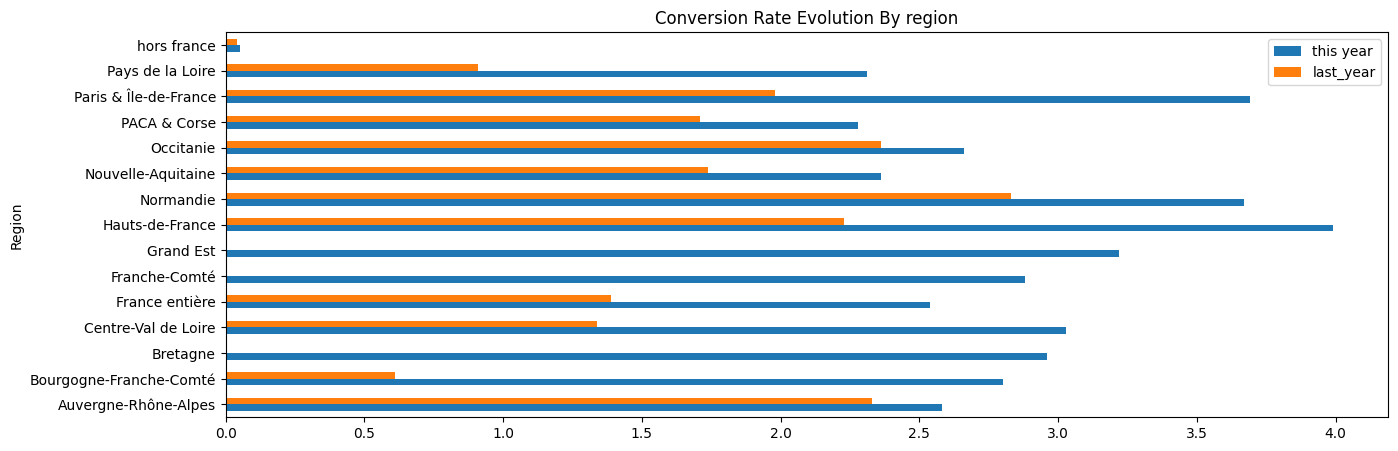

In [138]:
views_by_region = sales.groupby("Region")["Views"].sum()
views_by_region_last_year = sales.groupby("Region")["Views Last Year"].sum()

conversion_rate_by_region = pd.Series((quantity_by_region * 100 / views_by_region).round(2), name="Conversion Rate")
conversion_rate_by_region_last_year = pd.Series((quantity_by_region_last_year * 100 / views_by_region_last_year).round(2), name="Conversion Rate")


print(pd.concat([views_by_region_last_year, quantity_by_region_last_year, conversion_rate_by_region_last_year.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

print("\n")
print(pd.concat([views_by_region, quantity_by_region, conversion_rate_by_region.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

df = pd.DataFrame({"this year": conversion_rate_by_region, "last_year":conversion_rate_by_region_last_year}, index=regions)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Conversion Rate Evolution By Region")

## --- Duration ---

### Weight of Duration in last year's Sales

total sales of activities with a specified duration last year: 199248.76 over 289 rows


,Sales Last Year (in euros),Weight (in %)
Duration,,
10.0,0.00,0.00
80.0,0.00,0.00
70.0,0.00,0.00
50.0,0.00,0.00
105.0,0.00,0.00
150.0,0.00,0.00
22.0,0.00,0.00
15.0,0.00,0.00
12.0,0.00,0.00


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in last year's Sales with a specified duration (289 rows)")

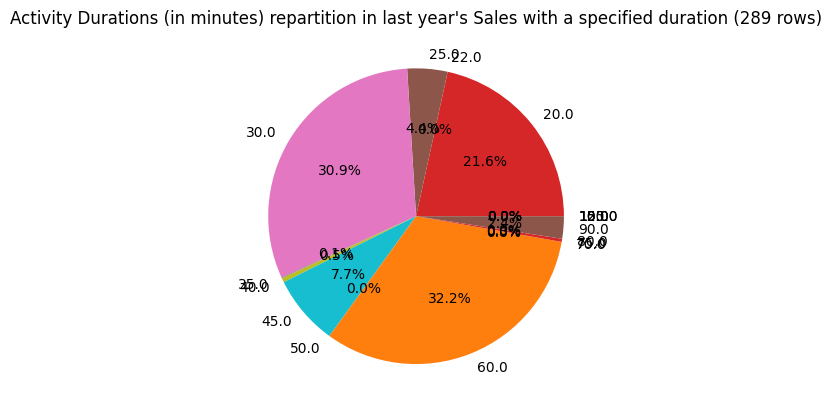

In [84]:
dur_sales_last_year = sales.loc[~pd.isna(sales["Duration"])]["Sales Last Year"].sum()
dur_sales_last_year_count = sales.loc[~pd.isna(sales["Duration"])]["Sales Last Year"].count()
dur_sales = sales.loc[~pd.isna(sales["Duration"])]["Sales"].sum()
dur_sales_count = sales.loc[~pd.isna(sales["Duration"])]["Sales"].count()
print(f'total sales of activities with a specified duration last year: {dur_sales_last_year} over {dur_sales_last_year_count} rows')
sales_by_duration = pd.Series(sales.groupby("Duration")["Sales"].sum(), name="Sales (in euros)")
sales_by_duration_last_year = pd.Series(sales.groupby("Duration")["Sales Last Year"].sum(), name="Sales Last Year (in euros)")
weight_last_year = pd.Series((sales_by_duration_last_year * 100 / dur_sales_last_year).round(2), name="Weight (in %)")
weight = pd.Series((sales_by_duration * 100 / dur_sales).round(2), name="Weight (in %)")

display(pd.concat([sales_by_duration_last_year, weight_last_year], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(sales_by_duration_last_year, labels=sales_by_duration_last_year.keys(), autopct='%1.1f%%')
ax.set_title(f"Activity Durations (in minutes) repartition in last year's Sales with a specified duration ({dur_sales_last_year_count} rows)")

### Weight of Duration in this year's Sales

total sales of activities with a specified duration last year: 606548.3 over 289 rows


,Sales (in euros),Weight (in %)
Duration,,
12.0,0.00,0.00
105.0,0.00,0.00
22.0,0.00,0.00
35.0,0.00,0.00
40.0,384.88,0.06
70.0,559.65,0.09
150.0,793.22,0.13
50.0,1049.65,0.17
15.0,1550.73,0.26


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in this year's Sales with a specified duration (289 rows)")

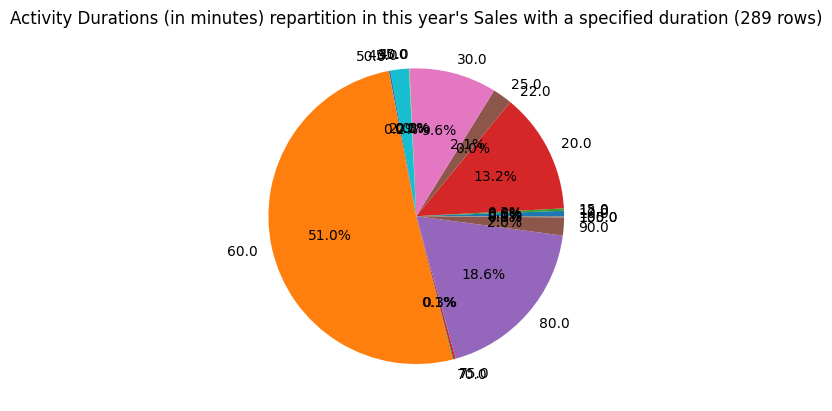

In [81]:
print(f'total sales of activities with a specified duration last year: {dur_sales} over {dur_sales_count} rows')

display(pd.concat([sales_by_duration, weight], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(sales_by_duration, labels=sales_by_duration.keys(), autopct='%1.1f%%')
ax.set_title(f"Activity Durations (in minutes) repartition in this year's Sales with a specified duration ({dur_sales_count} rows)")

### Sales evolution by Duration

,Sales Last Year (in euros),Sales (in euros),Evolution (in %)
Duration,,,
35.0,183.25,0.00,-100.00
40.0,913.08,384.88,-57.85
45.0,15270.67,12231.81,-19.90
30.0,61478.92,57989.86,-5.68
25.0,8752.59,12956.41,48.03
20.0,42974.59,79963.59,86.07
75.0,666.50,1568.58,135.35
90.0,4874.08,11901.40,144.18
60.0,64135.08,309198.65,382.11


Text(0.5, 1.0, 'Sales evolution (in euros) by Duration by Year')

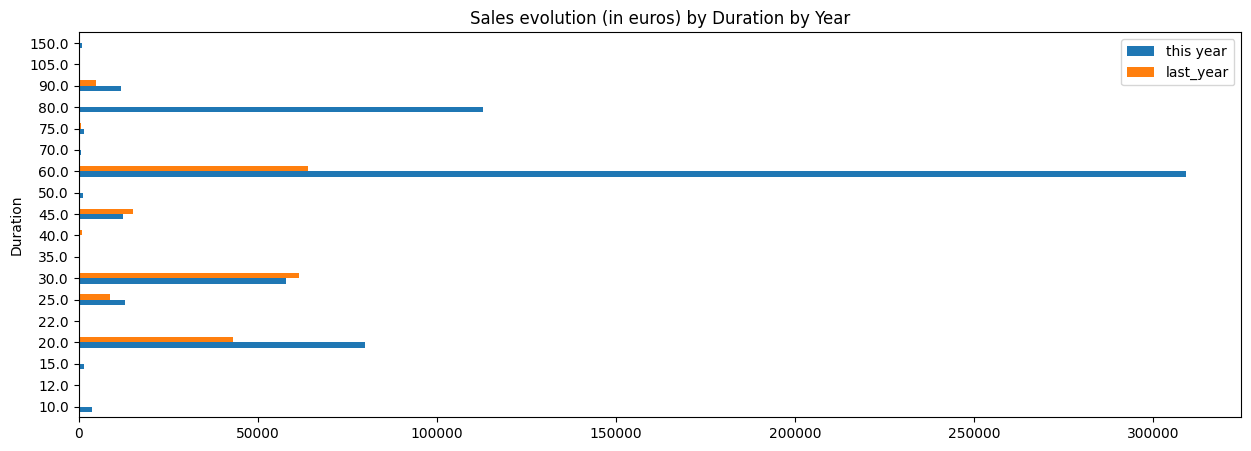

In [85]:
percentage = pd.Series((sales_by_duration * 100 / sales_by_duration_last_year - 100).round(2), name="Evolution (in %)")
display(pd.concat([sales_by_duration_last_year, sales_by_duration, percentage], axis=1).sort_values(by="Evolution (in %)"))
df = pd.DataFrame({"this year": sales_by_duration, "last_year":sales_by_duration_last_year}, index=sales_by_duration.keys())
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales evolution (in euros) by Duration by Year")

### Weight of Duration in last year's Quantities


total quantity of activities with a specified duration last year: 199248.76 over 289 rows


,Sales Last Year (in quantities),Weight (in %)
Duration,,
10.0,0.0,0.00
80.0,0.0,0.00
70.0,0.0,0.00
50.0,0.0,0.00
105.0,0.0,0.00
150.0,0.0,0.00
22.0,0.0,0.00
15.0,0.0,0.00
12.0,0.0,0.00


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in last year's Sales with a specified duration (289 rows)")

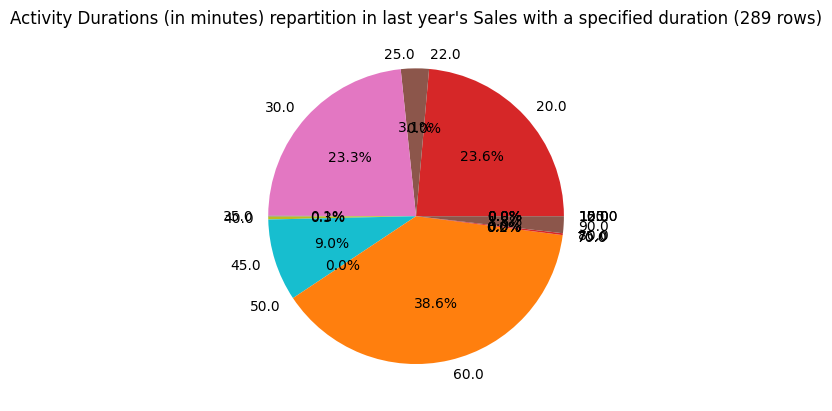

In [86]:
dur_qtt_last_year = sales.loc[~pd.isna(sales["Duration"])]["Quantity Last Year"].sum()
dur_qtt_last_year_count = sales.loc[~pd.isna(sales["Duration"])]["Quantity Last Year"].count()
dur_qtt = sales.loc[~pd.isna(sales["Duration"])]["Quantity"].sum()
dur_qtt_count = sales.loc[~pd.isna(sales["Duration"])]["Quantity"].count()
print(f'total quantity of activities with a specified duration last year: {dur_qtt_last_year} over {dur_qtt_last_year_count} rows')
qtt_by_duration = pd.Series(sales.groupby("Duration")["Quantity"].sum(), name="Sales (in quantities)")
qtt_by_duration_last_year = pd.Series(sales.groupby("Duration")["Quantity Last Year"].sum(), name="Sales Last Year (in quantities)")
weight_last_year = pd.Series((qtt_by_duration_last_year * 100 / dur_qtt_last_year).round(2), name="Weight (in %)")
weight = pd.Series((qtt_by_duration * 100 / dur_qtt).round(2), name="Weight (in %)")

display(pd.concat([qtt_by_duration_last_year, weight_last_year], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(qtt_by_duration_last_year, labels=qtt_by_duration_last_year.keys(), autopct='%1.1f%%')
ax.set_title(f"Activity Durations (in minutes) repartition in last year's Sales with a specified duration ({dur_qtt_last_year_count} rows)")

### Weight of Duration in this year's Quantities


total quantities of activities with a specified duration last year: 2785.0 over 289 rows


,Sales (in quantities),Weight (in %)
Duration,,
12.0,0.0,0.00
105.0,0.0,0.00
35.0,0.0,0.00
22.0,0.0,0.00
40.0,1.0,0.04
150.0,1.0,0.04
50.0,4.0,0.14
70.0,4.0,0.14
75.0,5.0,0.18


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in this year's Quantities with a specified duration (289 rows)")

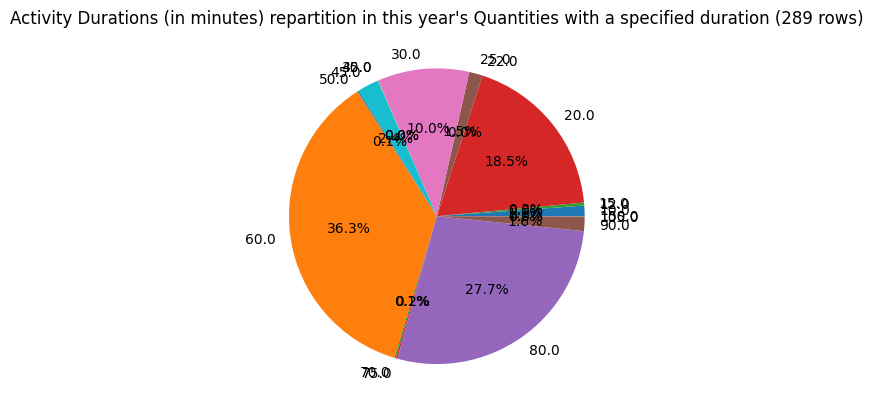

In [87]:
print(f'total quantities of activities with a specified duration last year: {dur_qtt} over {dur_qtt_count} rows')

display(pd.concat([qtt_by_duration, weight], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(qtt_by_duration, labels=qtt_by_duration.keys(), autopct='%1.1f%%')
ax.set_title(f"Activity Durations (in minutes) repartition in this year's Quantities with a specified duration ({dur_qtt_count} rows)")

### Quantities evolution by Duration

,Sales Last Year (in quantities),Sales (in quantities),Evolution (in %)
Duration,,,
35.0,1.0,0.0,-100.00
40.0,3.0,1.0,-66.67
45.0,88.0,66.0,-25.00
30.0,228.0,279.0,22.37
25.0,30.0,41.0,36.67
20.0,231.0,516.0,123.38
90.0,18.0,44.0,144.44
75.0,2.0,5.0,150.00
60.0,378.0,1012.0,167.72


Text(0.5, 1.0, 'Sales evolution (in quantities) by Duration by Year')

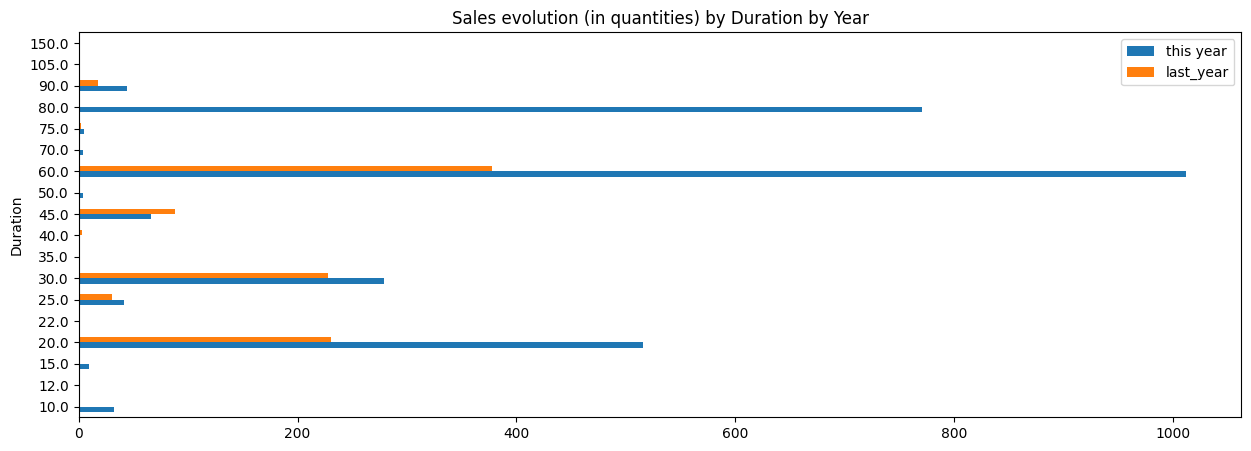

In [88]:
percentage = pd.Series((qtt_by_duration * 100 / qtt_by_duration_last_year - 100).round(2), name="Evolution (in %)")
display(pd.concat([qtt_by_duration_last_year, qtt_by_duration, percentage], axis=1).sort_values(by="Evolution (in %)"))
df = pd.DataFrame({"this year": qtt_by_duration, "last_year":qtt_by_duration_last_year}, index=qtt_by_duration.keys())
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales evolution (in quantities) by Duration by Year")

## --- Product Types ---

### Weight of Product Types in Last Year's Sales

total sales last year: 830169.2499999999


,Sales Last Year (in euros),Weight (in %)
Type,,
(Durée) Survol,0.00,0.00
Un vol en,0.00,0.00
Un vol,0.00,0.00
Un tour découverte en hélicoptère,0.00,0.00
Un tour,0.00,0.00
Survol en duo,0.00,0.00
Survol (Durée),0.00,0.00
Simulateur de chute libre,0.00,0.00
Promenade originale,0.00,0.00


Text(0.5, 1.0, "Product Type repartition in last year's Sales")

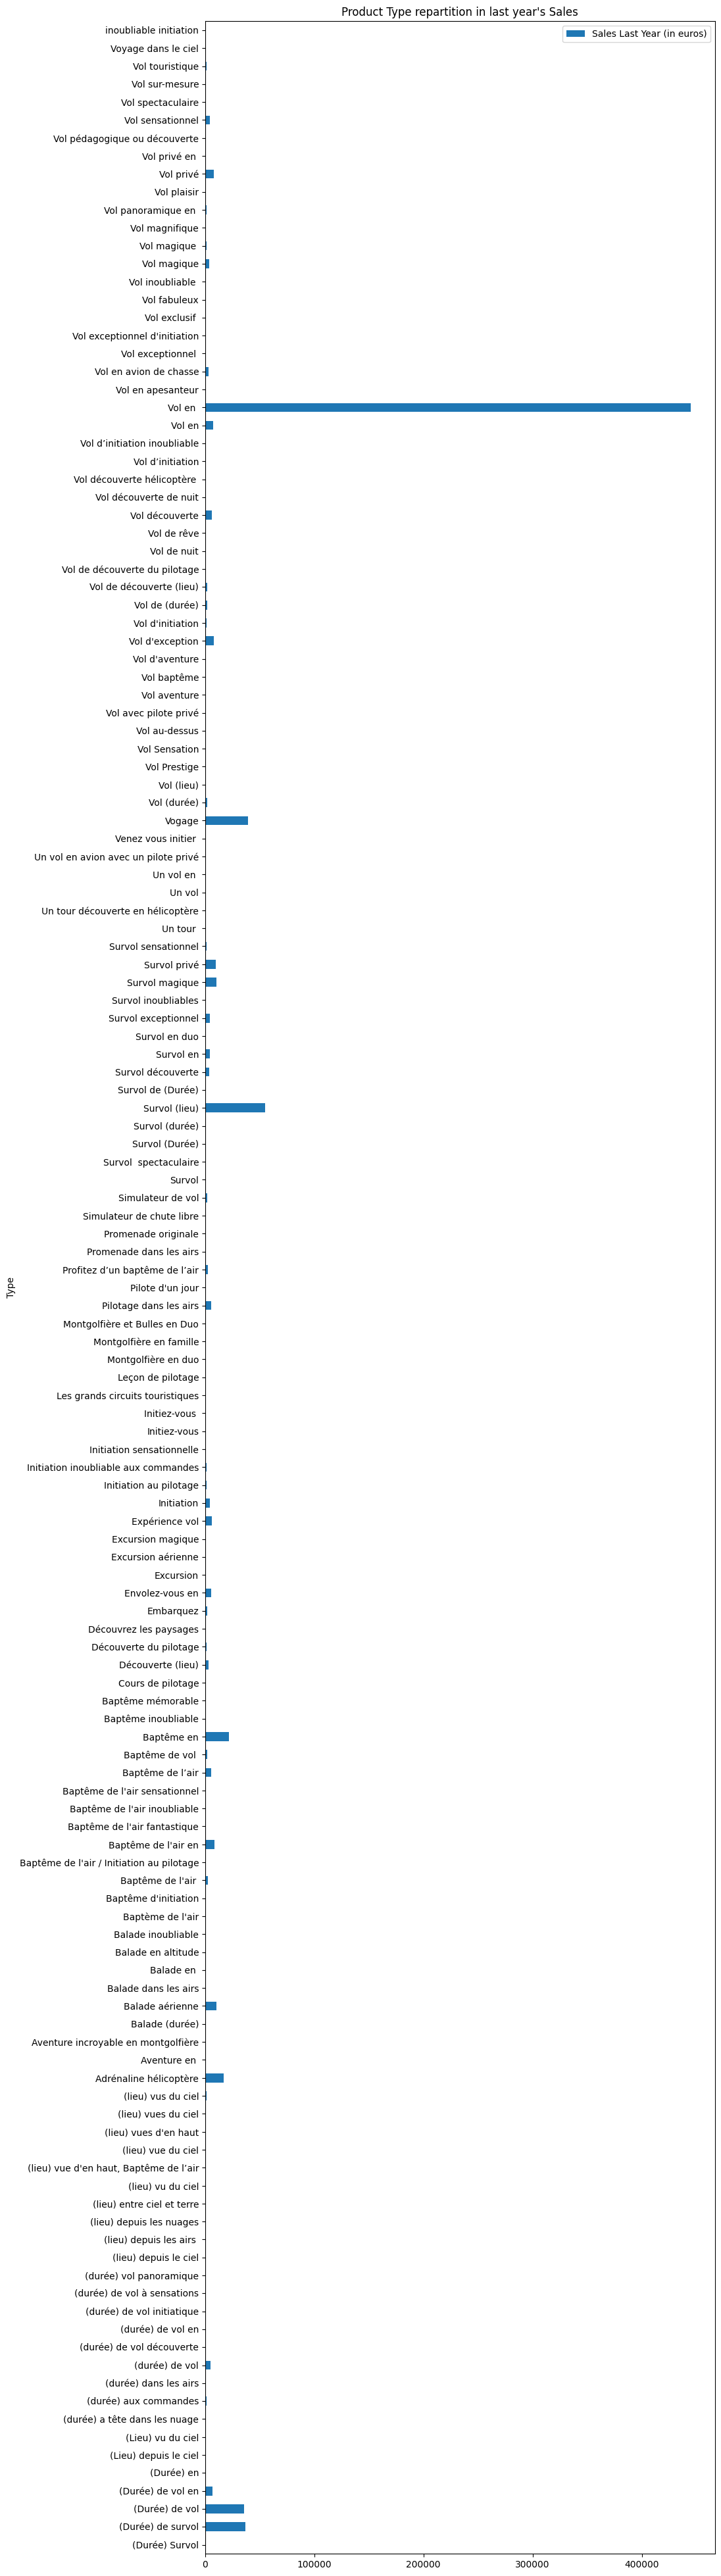

In [100]:
pd.set_option('display.max_rows', None)

print(f'total sales last year: {total_sales_last_year} euros')
sales_by_product_type = pd.Series(sales.groupby("Type")["Sales"].sum(), name="Sales (in euros)")
sales_by_product_type_last_year = pd.Series(sales.groupby("Type")["Sales Last Year"].sum(), name="Sales Last Year (in euros)")
weight_last_year = pd.Series((sales_by_product_type_last_year * 100 / total_sales_last_year).round(2), name="Weight (in %)")
weight = pd.Series((sales_by_product_type * 100 / total_sales_last_year).round(2), name="Weight (in %)")

display(pd.concat([sales_by_product_type_last_year, weight_last_year], axis=1).sort_values(by="Weight (in %)"))
# fig, ax = plt.subplots()
df = pd.DataFrame(sales_by_product_type_last_year, index=sales_by_product_type_last_year.keys())
ax = df.plot.barh(figsize=(10, 50))
# ax.barh(sales_by_product_type_last_year, index=sales_by_product_type_last_year.keys())
ax.set_title(f"Product Type repartition in last year's Sales")

### Weight of Product Types in this Year's Sales

total sales this year: 1637209.3


,Sales (in euros),Weight (in %)
Type,,
Pilote d'un jour,0.00,0.00
Aventure en,0.00,0.00
Excursion aérienne,0.00,0.00
Montgolfière et Bulles en Duo,0.00,0.00
Vol exceptionnel d'initiation,0.00,0.00
Balade dans les airs,0.00,0.00
Montgolfière en famille,0.00,0.00
Balade en altitude,0.00,0.00
Vol exceptionnel,0.00,0.00


Text(0.5, 1.0, "Product Type repartition in this year's Sales")

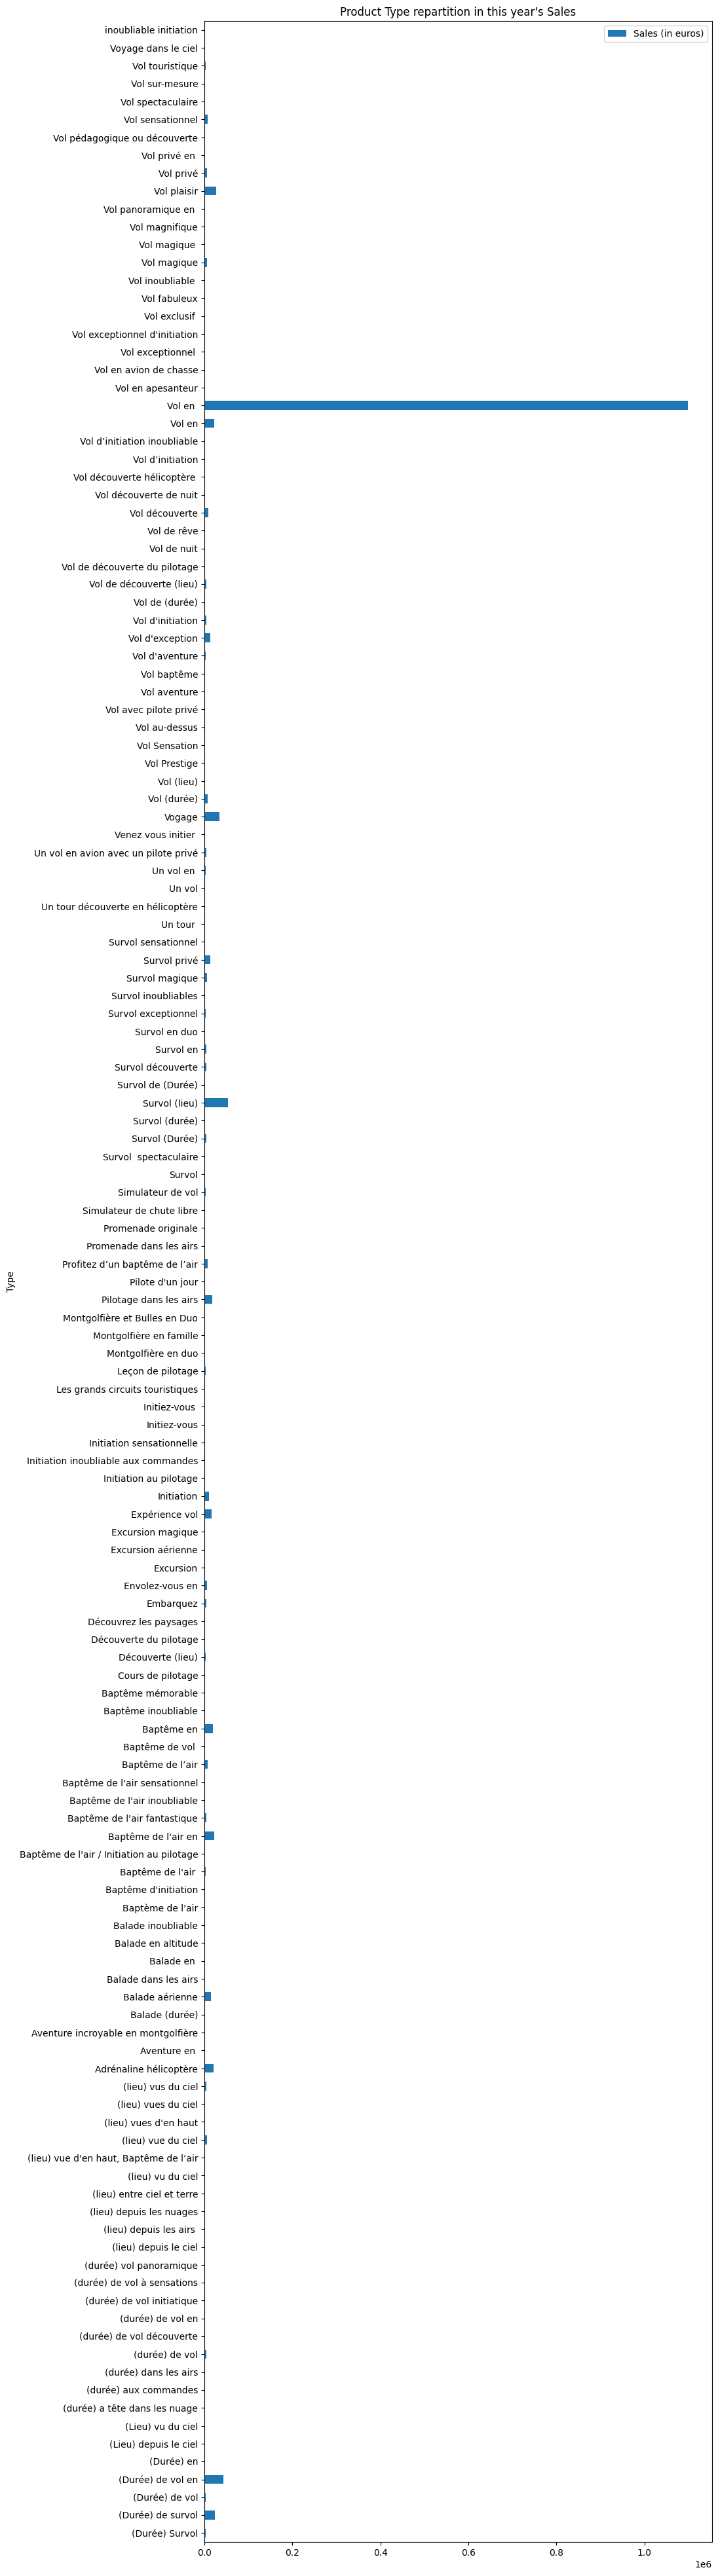

In [101]:
print(f'total sales this year: {total_sales} euros')

display(pd.concat([sales_by_product_type, weight], axis=1).sort_values(by="Weight (in %)"))
df = pd.DataFrame(sales_by_product_type, index=sales_by_product_type.keys())
ax = df.plot.barh(figsize=(10, 50))
ax.set_title(f"Product Type repartition in this year's Sales")